<a href="https://colab.research.google.com/github/neha-369-tes/PRODIGY_DS_02/blob/main/PRODIGY_DS_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [2]:
test = pd.read_csv("/content/test.csv")
train = pd.read_csv("/content/train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


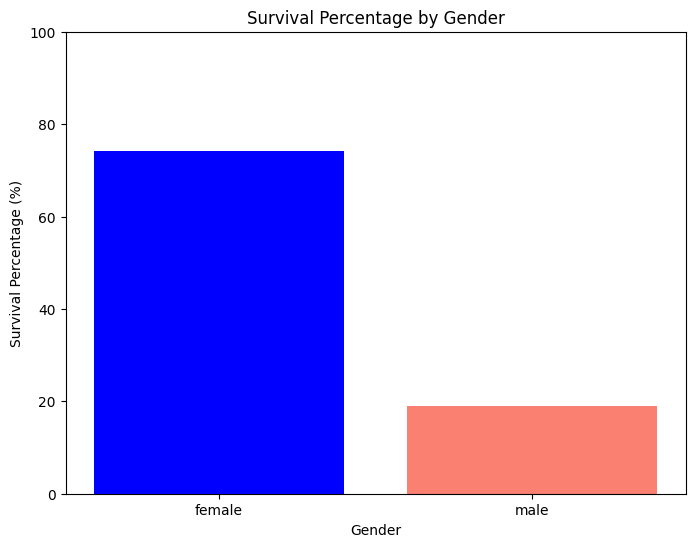

In [7]:
survival_percentages = train.groupby('Sex')['Survived'].mean() * 100
print(survival_percentages)
plt.figure(figsize=(8, 6))
plt.bar(survival_percentages.index, survival_percentages, color=['blue', 'salmon'])
plt.xlabel('Gender')
plt.ylabel('Survival Percentage (%)')
plt.title('Survival Percentage by Gender')
plt.ylim(0, 100)
plt.show()

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


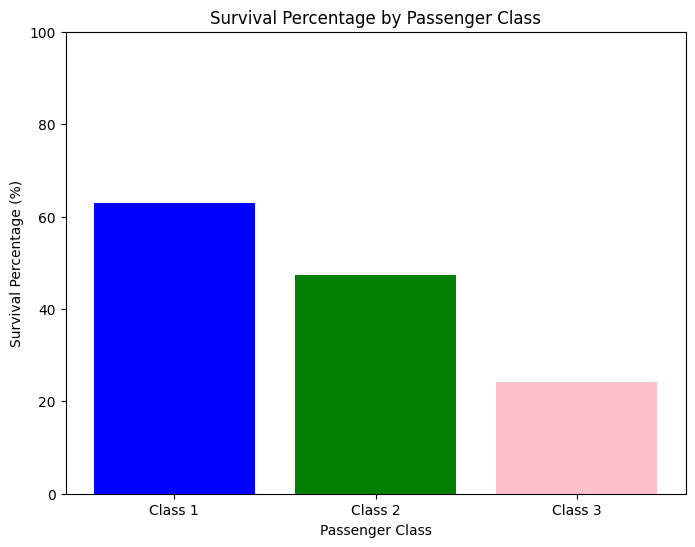

In [8]:
survival_percentages_by_class = train.groupby('Pclass')['Survived'].mean() * 100
print(survival_percentages_by_class)
plt.figure(figsize=(8, 6))

plt.bar(survival_percentages_by_class.index, survival_percentages_by_class, color=['blue','green','pink'])
plt.xlabel('Passenger Class')
plt.ylabel('Survival Percentage (%)')
plt.title('Survival Percentage by Passenger Class')
plt.ylim(0, 100)
plt.xticks(ticks=survival_percentages_by_class.index, labels=[f'Class {i}' for i in survival_percentages_by_class.index])

plt.show()

In [9]:
label_encoder = LabelEncoder()
train['Sex'] = label_encoder.fit_transform(train['Sex'])
test['Sex'] = label_encoder.transform(test['Sex'])
x_train = train[["Pclass", "Sex", "SibSp", "Parch"]]
y_train = train['Survived']

x_train.head()

,Pclass,Sex,SibSp,Parch
0,3,1,1,0
1,1,0,1,0
2,3,0,0,0
3,1,0,1,0
4,3,1,0,0


In [10]:
y_train.head()


,Survived
0,0
1,1
2,1
3,1
4,0


In [11]:
x_test = test[["Pclass", "Sex", "SibSp", "Parch"]]



In [12]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [13]:
train_pred = logreg.predict(x_train)
y_pred = logreg.predict(x_test)

In [14]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_pred})
output.to_csv('submission.csv', index=False)
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
